# Plotting E3SMv2 Output with UXarray

This notebook showcases the Department of Energy (DOE)'s global climate model - the [Energy Exascale Earth System Model (E3SM)](https://e3sm.org/)'s output, that is on an unstructured grid, with the use of UXarray's plotting functions, including the basic `.plot()`, `.rasterize()`, and projections. 

- E3SM Grid (ne30pg2)
  
Variables showcased: 
- TS (Surface Temperature)
- FLUT (Upwelling longwave flux at top of model)
- QFLX (Precipitation Flux at Surface) 

## Imports
This notebook requires the following packages to be installed in the notebook environment. UXarray comes with dependency packages including xarray, matplotlib, cartopy, and geoviews. 
```
mamba install -c conda-forge uxarray
```

In [2]:
import uxarray as ux
import cartopy.crs as ccrs
import geoviews as gv
import geoviews.feature as gf
import warnings

warnings.filterwarnings("ignore")

## Data

Data loaded in this notebook is the simulated output from the Department of Energy (DOE) Energy Exascale Earth System Model (E3SM) version 2. The case is set up as an atmosphere-only (AMIP) simulation with present-day control forcing (F2010) at a 1-degree horizontal resolution (ne30pg2), where sea surface temperatures and sea ice set as default as in the E3SMv2 model. The case is run for 6 years.

In the following section, this notebook will showcase the Decemeber output in the 6th simulated year. 

In [3]:
data_path = "/glade/campaign/cisl/vast/uxarray/data/e3sm_keeling/ENSO_ctl_1std/unstructured/20231220.F2010.ENSO_ctl.lagreg.ne30pg2_EC30to60E2r2.keeling.eam.h0.0006-12.nc"
grid_file = (
    "/glade/campaign/cisl/vast/uxarray/data/e3sm_keeling/E3SM_grid/ne30pg2_grd.nc"
)
uxds_e3sm = ux.open_dataset(grid_file, data_path)

## Check Grid Property

In [4]:
uxgrid = uxds_e3sm.uxgrid
uxgrid

<uxarray.Grid>
Original Grid Type: Scrip
Grid Dimensions:
  * n_node: 21727
  * n_edge: 43326
  * n_face: 21600
  * n_max_face_nodes: 4
  * two: 2
  * n_nodes_per_face: (21600,)
Grid Coordinates (Spherical):
  * node_lon: (21727,)
  * node_lat: (21727,)
  * face_lon: (21600,)
  * face_lat: (21600,)
Grid Coordinates (Cartesian):
Grid Connectivity Variables:
  * face_node_connectivity: (21600, 4)
  * edge_node_connectivity: (43326, 2)
Grid Descriptor Variables:
  * n_nodes_per_face: (21600,)

## E3SM ne30pg2 (1 degree) Grid

CPU times: user 12.6 ms, sys: 0 ns, total: 12.6 ms
Wall time: 11.7 ms


:Path   [Longitude,Latitude]
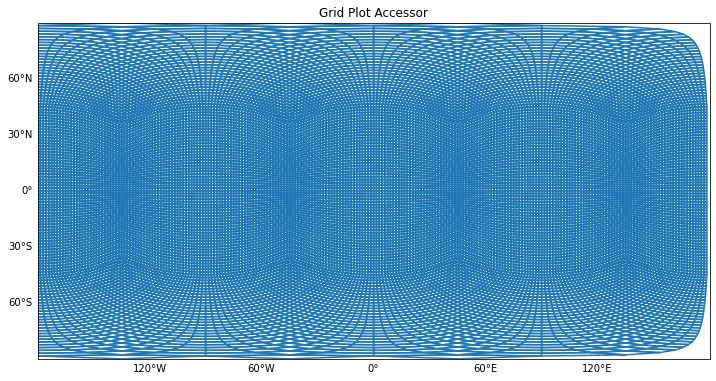

In [18]:
%%time
uxgrid.plot(height=700, width=1000, title="Grid Plot Accessor", backend="matplotlib")

## Surface Temperature 

Plotting requires the UXDataAarray to have the spatial geometries as the only dimension (`n_faces`, `n_nodes`, or `n_edges`) and therefore `.isel(time=0)` is called.

To set the limits of the colorbar, include the arugment `clim=(lowlim,uplim)`. By calling the default `.plot`, the plots are rasterized. 

Brighter regions imply warmer surface temperature. 

CPU times: user 62.3 ms, sys: 3.92 ms, total: 66.2 ms
Wall time: 65.3 ms


:DynamicMap   []
   :Overlay
      .Image.I     :Image   [Longitude,Latitude]   (Longitude_Latitude TS)
      .Coastline.I :Feature   [Longitude,Latitude]
      .Borders.I   :Feature   [Longitude,Latitude]
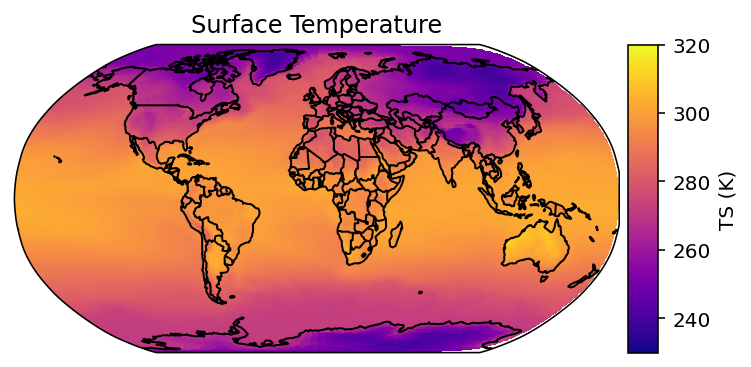

In [13]:
%%time
uxds_e3sm.TS.isel(time=0).plot(
    height=200,
    width=450,
    clim=(230, 320),
    clabel="TS (K)",
    backend="matplotlib",
    cmap="plasma",
    projection=ccrs.Robinson(),
    features=["borders", "coastline"],
    title="Surface Temperature",
)

## Upwelling longwave flux at top of model (FLUT) 

Regions with brighter color indicate stronger upwelling longwave flux. 

CPU times: user 22.2 ms, sys: 0 ns, total: 22.2 ms
Wall time: 21.5 ms


:DynamicMap   []
   :Overlay
      .Image.I     :Image   [Longitude,Latitude]   (Longitude_Latitude FLUT)
      .Coastline.I :Feature   [Longitude,Latitude]
      .Borders.I   :Feature   [Longitude,Latitude]
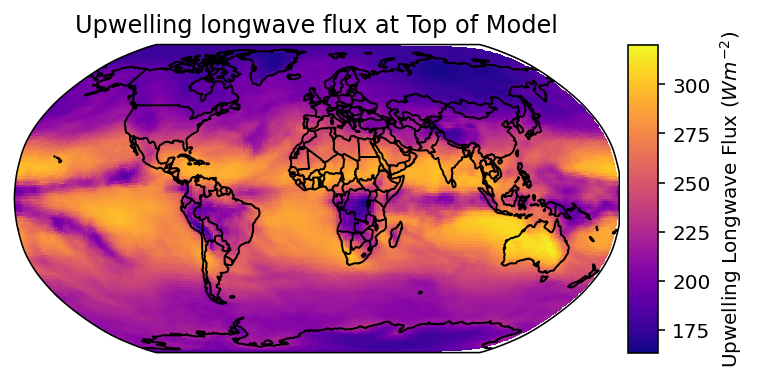

In [14]:
%%time
uxds_e3sm.FLUT.isel(time=0).plot(
    height=200,
    width=450,
    clabel="Upwelling Longwave Flux ($W m^{-2}$)",
    cmap="plasma",
    backend="matplotlib",
    projection=ccrs.Robinson(),
    features=["borders", "coastline"],
    title="Upwelling longwave flux at Top of Model",
)

## Precipitation Flux at Surface (QFLX) 

Orthographic projection centered in the US East Coast is applied when visualizing the precipitation flux at surface.

Brighter regions have a larger surface precipitation flux. 

CPU times: user 954 ms, sys: 7.79 ms, total: 962 ms
Wall time: 961 ms


:DynamicMap   []
   :Overlay
      .Image.I     :Image   [Longitude,Latitude]   (Longitude_Latitude QFLX)
      .Coastline.I :Feature   [Longitude,Latitude]
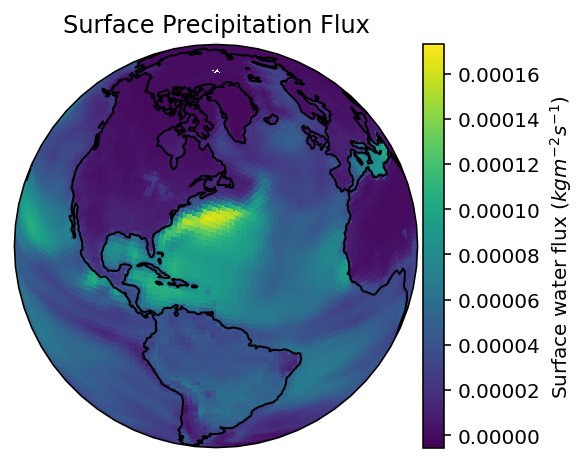

In [15]:
%%time
projection = ccrs.Orthographic(central_latitude=30, central_longitude=-60)
uxds_e3sm.QFLX.isel(time=0).plot(
    height=300,
    width=300,
    clabel="Surface water flux ($kg m^{-2}s^{-1}$)",
    cmap="viridis",
    backend="matplotlib",
    projection=projection,
    periodic_elements="split",
    coastline=True,
    title="Surface Precipitation Flux",
)